<a href="https://colab.research.google.com/github/vinods03/deep_learning/blob/main/CNN_Document_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
base_dir = '/content/drive/MyDrive/DocumentClassification'

In [4]:
folders = []

import os
for i in os.listdir(base_dir):
  folders.append(os.path.join(base_dir, i))

folders

['/content/drive/MyDrive/DocumentClassification/email',
 '/content/drive/MyDrive/DocumentClassification/resume',
 '/content/drive/MyDrive/DocumentClassification/scientific_publication']

In [5]:
dataset = []

for i in range(0, len(folders)):
  for j in os.listdir(folders[i]):
    dataset.append(os.path.join(folders[i], j))

# dataset
len(dataset)

165

In [6]:
translate = {'email':0,'resume':1,'scientific_publication':2}
reverse_translate = {0:'email',1:'resume',2:'scientific_publication'}

In [7]:
# convert one sample image into an array

from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/DocumentClassification/email/doc_000042.png', target_size = (256,256))
img = img_to_array(img)
img = img/255
img

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.972549  , 0.972549  , 0.972549  ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

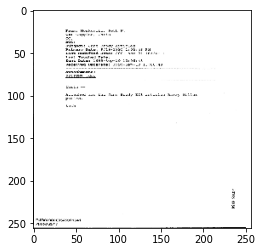

In [8]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [9]:
dataset

['/content/drive/MyDrive/DocumentClassification/email/doc_000195.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000133.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000275.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000115.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000260.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000042.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000238.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000142.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000196.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000079.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000111.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000076.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000046.png',
 '/content/drive/MyDrive/DocumentClassification/email/doc_000255.png',
 '/con

In [10]:
image_array = []
image_label = []

for i in dataset:
  img = load_img(i, target_size = (256,256))
  img = img_to_array(img)
  img = img/255
  image_array.append(img)
  label = translate[i.split('/')[-2]]
  image_label.append(label)


In [11]:
import numpy as np

image_array = np.array(image_array)
image_label = np.array(image_label)

print(image_array.shape)
print(image_label.shape)

(165, 256, 256, 3)
(165,)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_array, image_label, test_size = 0.2)

In [13]:
c = len(set(y_train))
print('The number of distinct classes in training data is', c)

d = len(set(y_test))
print('The number of distinct classes in test data is', d)

The number of distinct classes in training data is 3
The number of distinct classes in test data is 3


In [14]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Flatten, GlobalMaxPooling2D, Dropout, Dense
from tensorflow.keras.models import Model

In [15]:
X_train[0].shape

i = Input(shape = X_train[0].shape)

x = Conv2D(32, (3,3), strides = 2, activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)

x = Conv2D(64, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

x = Conv2D(256, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

# x = Flatten()(x)
x = GlobalMaxPooling2D()(x)

x = Dropout(0.2)(x)
x = Dense(256, activation = 'relu')(x)

x = Dropout(0.2)(x)
x = Dense(128, activation = 'relu')(x)

# x = Dropout(0.2)(x)
# x = Dense(64, activation = 'relu')(x)

x = Dropout(0.2)(x)
x = Dense(c, activation = 'softmax' )(x)

m = Model(i, x)

In [16]:
# opt = tf.keras.optimizers.Adam(0.0001)
# m.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# r = m.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

m.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
r = m.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

Epoch 1/20
5/5 [==============================] - 14s 197ms/step - loss: 5.2822 - accuracy: 0.3106 - val_loss: 1.0926 - val_accuracy: 0.3939
Epoch 2/20
5/5 [==============================] - 0s 40ms/step - loss: 1.7571 - accuracy: 0.4924 - val_loss: 1.0934 - val_accuracy: 0.3939
Epoch 3/20
5/5 [==============================] - 0s 40ms/step - loss: 1.6732 - accuracy: 0.4924 - val_loss: 1.0961 - val_accuracy: 0.3939
Epoch 4/20
5/5 [==============================] - 0s 39ms/step - loss: 1.2220 - accuracy: 0.4848 - val_loss: 1.1001 - val_accuracy: 0.3030
Epoch 5/20
5/5 [==============================] - 0s 39ms/step - loss: 1.0515 - accuracy: 0.5833 - val_loss: 1.1028 - val_accuracy: 0.3030
Epoch 6/20
5/5 [==============================] - 0s 41ms/step - loss: 0.9540 - accuracy: 0.6667 - val_loss: 1.1059 - val_accuracy: 0.3030
Epoch 7/20
5/5 [==============================] - 0s 41ms/step - loss: 0.6951 - accuracy: 0.7121 - val_loss: 1.1185 - val_accuracy: 0.3030
Epoch 8/20
5/5 [=========

In [17]:
batch_size = 21
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1)
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # featurewise_center=True,
    # featurewise_std_normalization=True,
    # rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    # horizontal_flip=True,
    # rescale=1./255,
    # shear_range=0.2,
    zoom_range=0.2)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = m.fit_generator(train_generator, validation_data = (X_test, y_test), steps_per_epoch = steps_per_epoch, epochs = 50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


Epoch 1/50
6/6 [==============================] - 2s 218ms/step - loss: 1.9325 - accuracy: 0.5476 - val_loss: 1.3633 - val_accuracy: 0.3030
Epoch 2/50
6/6 [==============================] - 1s 222ms/step - loss: 1.2789 - accuracy: 0.5045 - val_loss: 1.3652 - val_accuracy: 0.3030
Epoch 3/50
6/6 [==============================] - 1s 218ms/step - loss: 1.2356 - accuracy: 0.5135 - val_loss: 1.4608 - val_accuracy: 0.3030
Epoch 4/50
6/6 [==============================] - 1s 222ms/step - loss: 1.1134 - accuracy: 0.5135 - val_loss: 1.5512 - val_accuracy: 0.3030
Epoch 5/50
6/6 [==============================] - 1s 217ms/step - loss: 1.2075 - accuracy: 0.4775 - val_loss: 1.5668 - val_accuracy: 0.3030
Epoch 6/50
6/6 [==============================] - 1s 220ms/step - loss: 1.1499 - accuracy: 0.4324 - val_loss: 1.5856 - val_accuracy: 0.3030
Epoch 7/50
6/6 [==============================] - 1s 220ms/step - loss: 1.1443 - accuracy: 0.5315 - val_loss: 1.6637 - val_accuracy: 0.3030
Epoch 8/50
6/6 [====

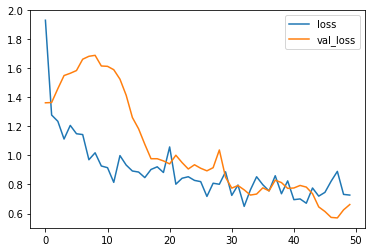

In [18]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

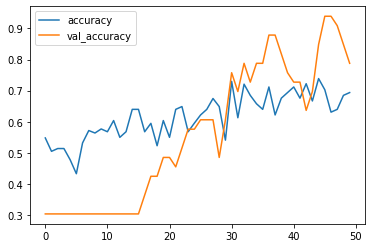

In [19]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [20]:
y_test_pred = m.predict(X_test)

In [21]:
y_test_pred

array([[0.10333513, 0.3199714 , 0.5766935 ],
       [0.23095784, 0.45683205, 0.3122101 ],
       [0.23989499, 0.5348526 , 0.22525236],
       [0.156027  , 0.58721614, 0.2567568 ],
       [0.04641104, 0.10666706, 0.84692186],
       [0.6336398 , 0.16894579, 0.19741435],
       [0.17065269, 0.5421628 , 0.28718457],
       [0.4576133 , 0.20782904, 0.33455768],
       [0.09982955, 0.307277  , 0.5928935 ],
       [0.17601222, 0.5554498 , 0.26853797],
       [0.27074212, 0.35784957, 0.37140828],
       [0.17567186, 0.5908312 , 0.23349695],
       [0.04490983, 0.13389157, 0.82119864],
       [0.14109336, 0.35966846, 0.49923822],
       [0.04723722, 0.20618345, 0.7465793 ],
       [0.24211687, 0.49547553, 0.26240757],
       [0.292448  , 0.44598398, 0.261568  ],
       [0.19740652, 0.35327363, 0.44931987],
       [0.08899375, 0.24619424, 0.664812  ],
       [0.2512646 , 0.43331692, 0.31541845],
       [0.28155407, 0.49419975, 0.2242462 ],
       [0.12013587, 0.21692386, 0.66294026],
       [0.

In [22]:
y_test_pred_decoded = []

for i in range(0, len(y_test_pred)):
  y_test_pred_decoded.append(y_test_pred[i].argmax())

y_test_pred_decoded

[2,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 1]

In [23]:
y_test

array([2, 1, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 2,
       0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1])

In [24]:
import sklearn.metrics as metrics
accuracy = metrics.accuracy_score(y_test, y_test_pred_decoded)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_test_pred_decoded, average = 'weighted')
recall = metrics.recall_score(y_test, y_test_pred_decoded, average = 'weighted')
f1 = metrics.f1_score(y_test, y_test_pred_decoded, average = 'weighted')
cm = metrics.confusion_matrix(y_test, y_test_pred_decoded)

print('accuracy:', accuracy)
print('error:', error)
print('precision:', precision)
print('recall:', recall)
print('f1:',f1)
print('\n')
print(cm)

from sklearn.metrics import classification_report
print('\n')
print(classification_report(y_test, y_test_pred_decoded))

accuracy: 0.7878787878787878
error: 0.21212121212121215
precision: 0.826388888888889
recall: 0.7878787878787878
f1: 0.7763528703967575


[[ 5  5  0]
 [ 0 11  2]
 [ 0  0 10]]


              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.69      0.85      0.76        13
           2       0.83      1.00      0.91        10

    accuracy                           0.79        33
   macro avg       0.84      0.78      0.78        33
weighted avg       0.83      0.79      0.78        33



In [25]:
# predict for 1 document

val_image = load_img('/content/drive/MyDrive/DocumentClassification/resume/doc_000809.png', target_size = (256,256))
val_image_arr = img_to_array(val_image)
val_image_arr = val_image_arr/255
val_image_arr = np.expand_dims(val_image_arr, axis = 0)
print(val_image_arr.shape)

document_prediction_details = m.predict(val_image_arr)
document_prediction = document_prediction_details.argmax()
print('The document is a', reverse_translate[document_prediction])

(1, 256, 256, 3)
The document is a resume
